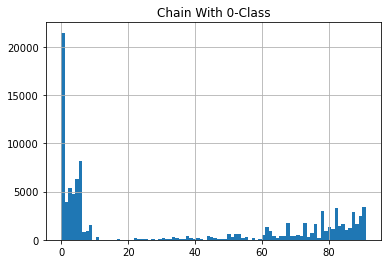

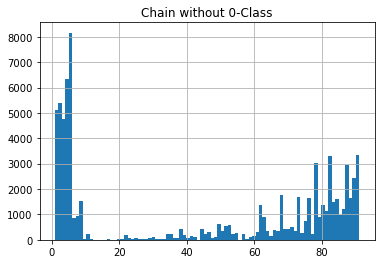

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv("../../data/dataset/train.csv")
n_chain_ids = df['chain'].nunique()

def plot(path):
    return pd.read_csv(path)

df.hist('chain', bins=n_chain_ids)
from matplotlib import pyplot as plt
plt.title("Chain With 0-Class")
plt.show()

df[df.chain!=0].hist('chain', bins=n_chain_ids)
plt.title("Chain without 0-Class")
plt.show()

      level_0  level_1                     path  chain_id  hotel_id
0       Train        0  78/cc0e73f1308eccf8.jpg        74       931
1       Train        1  90/84b47199bae2ce9c.jpg        86      4089
2       Train        2  90/e7e20b38199e9c1e.jpg        86      2315
3       Train        3   2/8a7a67855ef88147.jpg         2      6324
4       Train        4  44/ea7e9700e1a19cf8.jpg        40      3387
...       ...      ...                      ...       ...       ...
97551    Test     9751   6/beba2b44d0a02d7d.jpg         6      3459
97552    Test     9752   0/d4ff8917e0740e0b.jpg         0       179
97553    Test     9753  82/d16f42e59ab0b8f0.jpg        78      3185
97554    Test     9754  74/dbc9c181031f7e74.jpg        70      2956
97555    Test     9755  62/b3b1e4b96c6c6960.jpg        58      2959

[97556 rows x 5 columns]


array([[<AxesSubplot: title={'center': 'Test'}>,
        <AxesSubplot: title={'center': 'Train'}>],
       [<AxesSubplot: title={'center': 'Val'}>, <AxesSubplot: >]],
      dtype=object)

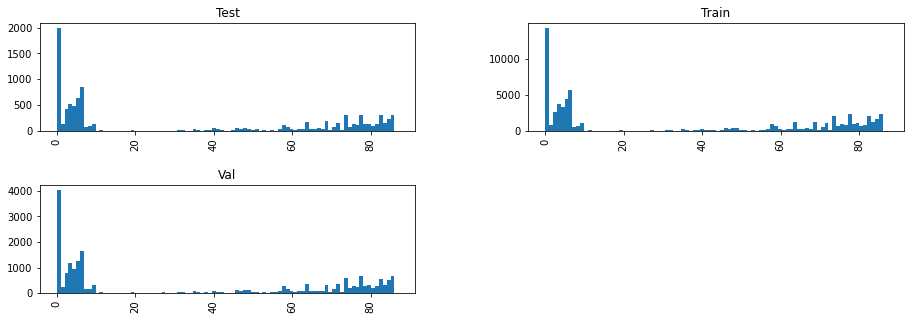

In [2]:
chain_ids = []
chain_ids.append(plot("../../data/dataset/hotel_train_chain.csv"))
chain_ids.append(plot("../../data/dataset/hotel_val_chain.csv"))
chain_ids.append(plot("../../data/dataset/hotel_test_chain.csv"))
split_data = pd.concat(chain_ids, axis=0, keys=['Train', 'Val', 'Test'])
split_data = split_data.reset_index()
print(split_data)
split_data.hist(column='chain_id', bins=88, by='level_0', figsize=(15, 5))

In [18]:
display(split_data[split_data.level_0 == 'Train']['hotel_id'].value_counts())
display(split_data.nunique())
# split_data[split_data.level_0 == 'Train']['hotel_id'].value_counts()

4283    76
7365    63
2292    63
3040    62
7114    62
        ..
7122     1
4733     1
4126     1
1556     1
6437     1
Name: hotel_id, Length: 7765, dtype: int64

level_0         3
level_1     68289
path        97554
chain_id       88
hotel_id     7770
dtype: int64

,level_1,path,chain_id,correct_chain_id
level_0,,,,
Train,76800,0/e307d93838f90f43.jpg,0,0
Train,63632,0/c2978b713c6e4ccc.jpg,0,0
Train,79867,0/bbbc08d1523a75c9.jpg,0,0
Train,63631,0/8dc1709f2f692dd0.jpg,0,0
Train,32810,0/c0c03c0f1f3fc3f1.jpg,0,0
...,...,...,...,...
Train,15716,91/eea1d22e95d12ac5.jpg,87,91
Train,67912,91/c1872d95c32a3df4.jpg,87,91
Train,2369,91/e090be885eb3ccd6.jpg,87,91


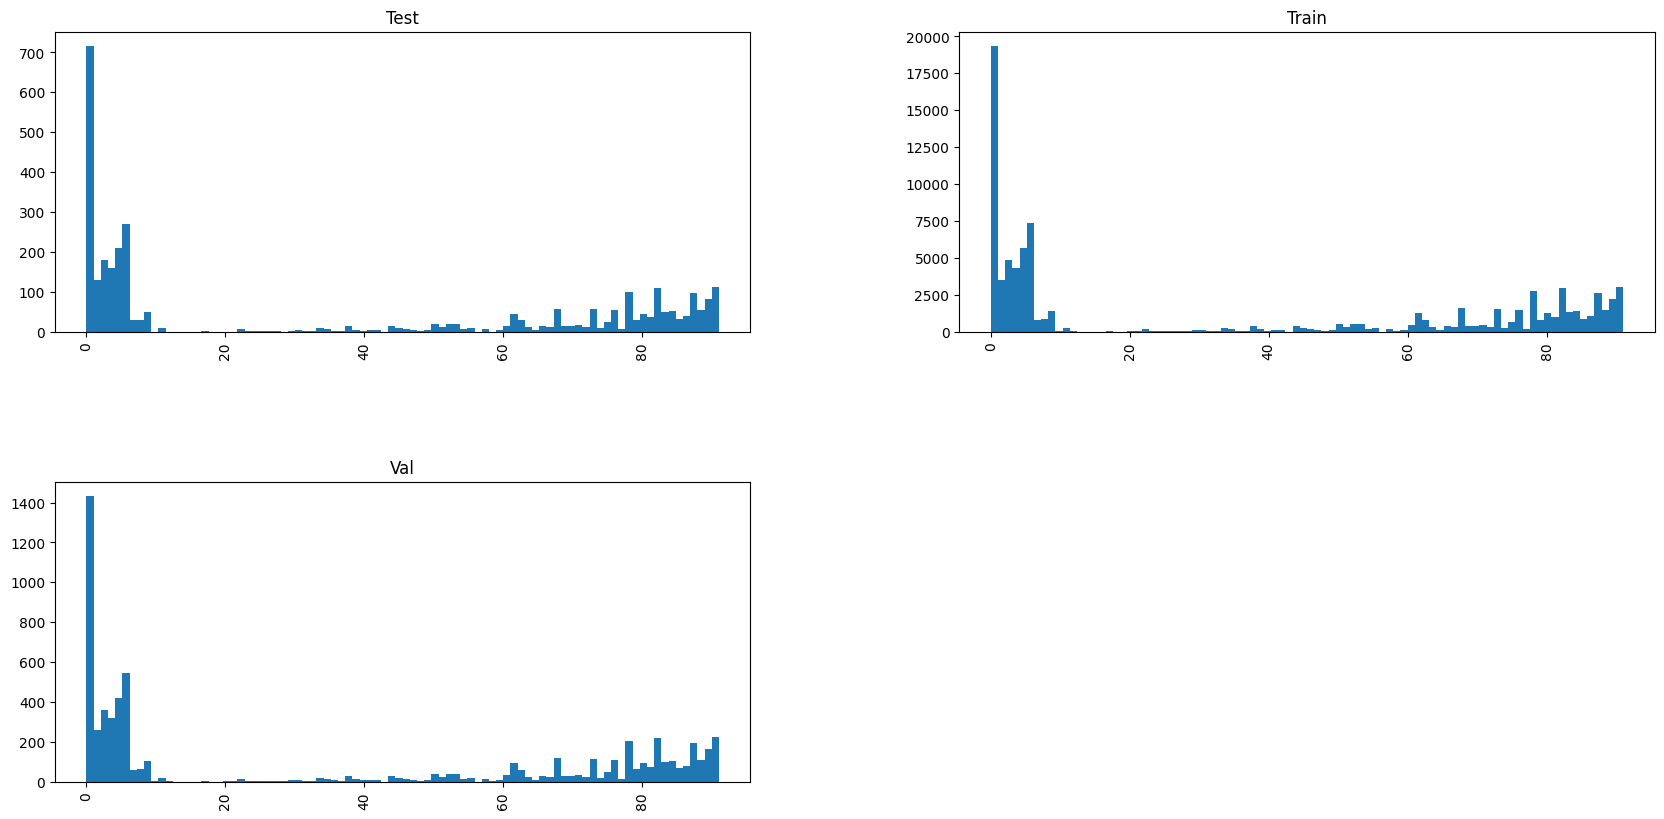

In [59]:
split_data['correct_chain_id'] = split_data.path.map(lambda s: s.split('/')[0]).astype(int)
split_data_i = split_data.set_index('level_0')
# split_data_i = split_data_i.sort_values('correct_chain_id')
split_data_i.hist('correct_chain_id', bins=88, by='level_0', figsize=(20, 10))
split_data_i

### GT Hotel ID Frequency

<AxesSubplot: >

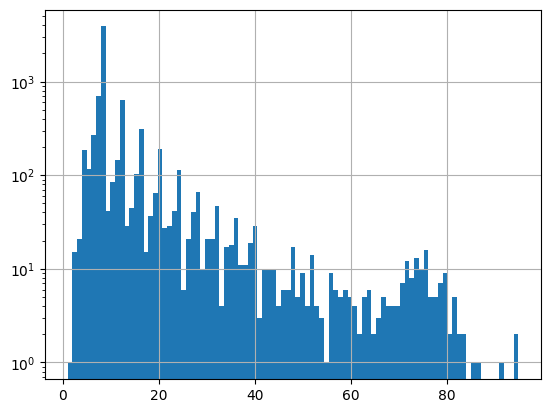

In [11]:
freq = pd.read_csv("../../data/dataset/train.csv").value_counts('hotel_id')
freq.hist(bins=freq.max(), log=True)